# 頂点間距離とユークリッド距離の間の関係

データの作成は`distances.py`で行った。

```python
params = {
    'num_of_strings': 30,
    'L': 2000,
    'frames': 1000,
    'plot': False,
    'save_image': False,
    'save_result': True,
}
```

作成されたデータは，`./results/data/distances/beta=0.00_161012_171430.npz`のように保存されている。

(3dデータを並べてインタラクティブに見るためにノートブック形式とする。)

In [135]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def plot_3d_wireframe(filename):
    data = np.load(filename)
    beta = data['beta']
    num_of_strings = data['num_of_strings']
    L = data['L']
    frames = data['frames']
    distance_list = data['distance_list']
    path_length = data['path_length']

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d(distance_list, path_length, bins=25)
    xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1] - xedges[0]) / 2.,
                             yedges[:-1] + (yedges[1] - yedges[0]) / 2.)
    zpos = hist.T
    ax.plot_wireframe(xpos, ypos, zpos, rstride=1)
    ax.plot(xpos[0], xpos[0], lw=2)

    ax.set_xlim(xedges[0], xedges[-1])
    ax.set_ylim(yedges[0], yedges[-1])
    ax.set_xlabel('Distance')
    ax.set_ylabel('Path length')
    ax.set_title('Path length and distances between two points in the cluster'
                + r'($\beta = %2.2f$)' % beta)
    plt.show()

In [12]:
result_data_path = {
    '0': "./results/data/distances/beta=0.00_161012_171430.npz",
    '5': "./results/data/distances/beta=5.00_161012_171649.npz",
    '10': "./results/data/distances/beta=10.00_161012_172119.npz",
    '15': "./results/data/distances/beta=15.00_161012_172209.npz",
    '20': "./results/data/distances/beta=20.00_161012_172338.npz",
    '0-2': "./results/data/distances/beta=0.00_161015_153311.npz",
    '5-2': "./results/data/distances/beta=5.00_161015_153838.npz",
    '10-2': "./results/data/distances/beta=10.00_161015_154048.npz",
    '15-2': "./results/data/distances/beta=15.00_161015_154136.npz",
    '20-2': "./results/data/distances/beta=20.00_161015_154419.npz"
}

<IPython.core.display.Javascript object>


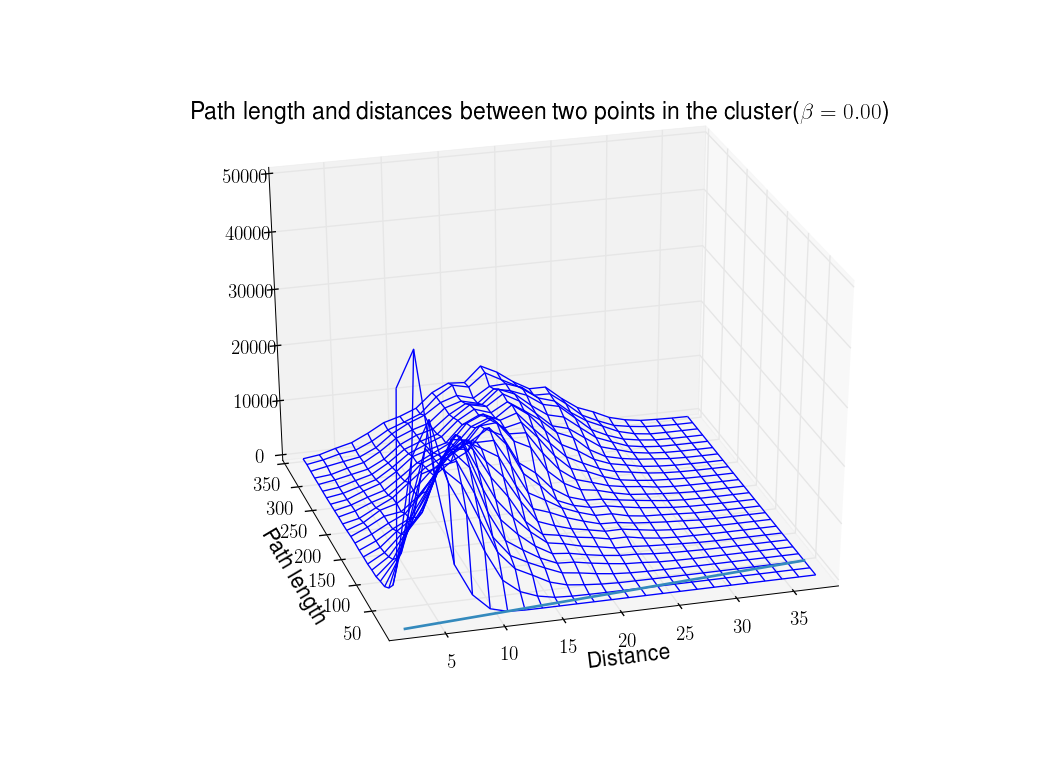

In [2]:
plot_3d_wireframe(result_data_path['0'])

<IPython.core.display.Javascript object>


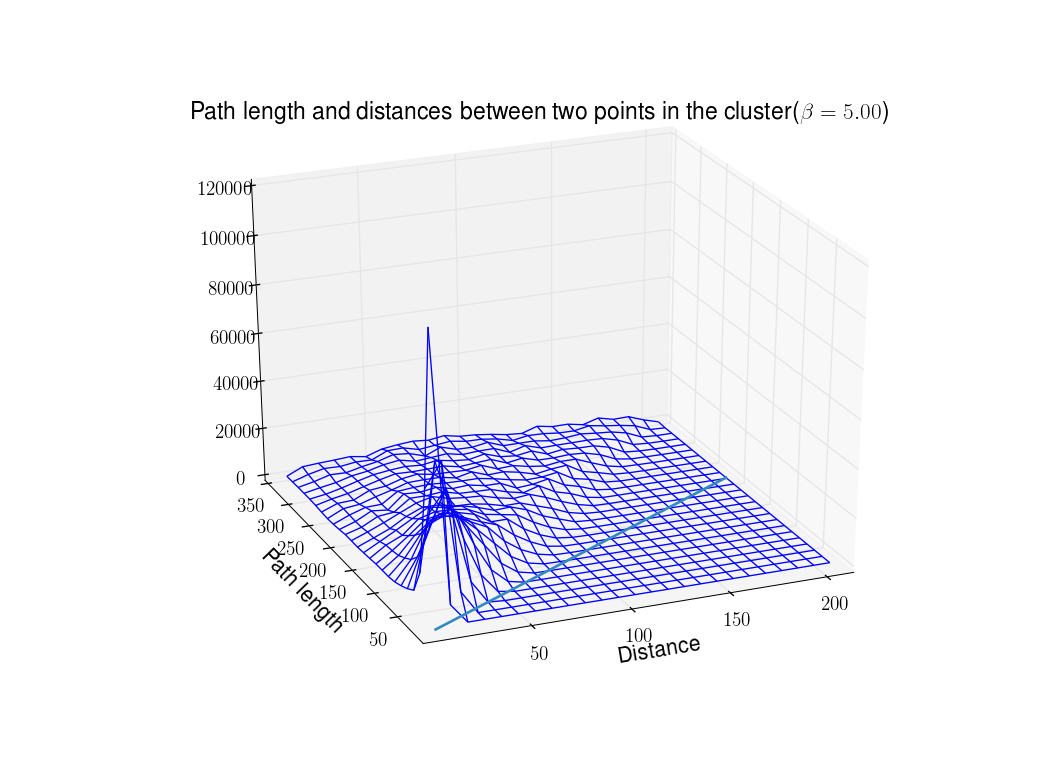

In [3]:
plot_3d_wireframe(result_data_path['5'])

<IPython.core.display.Javascript object>


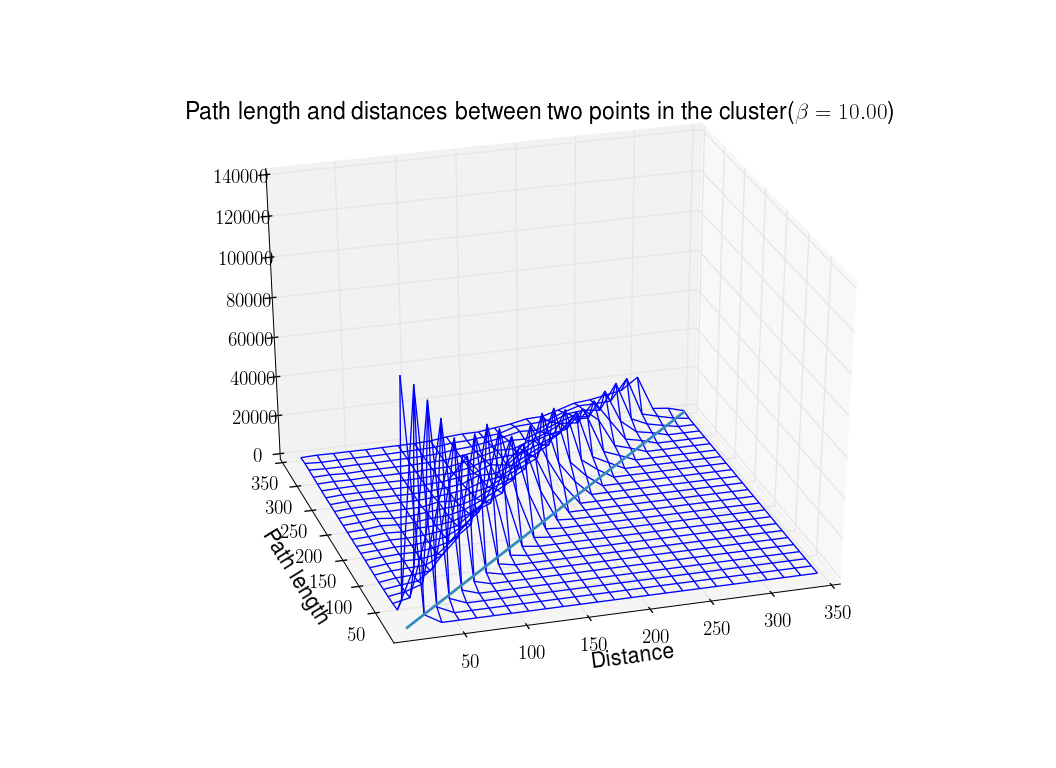

In [4]:
plot_3d_wireframe(result_data_path['10'])

<IPython.core.display.Javascript object>


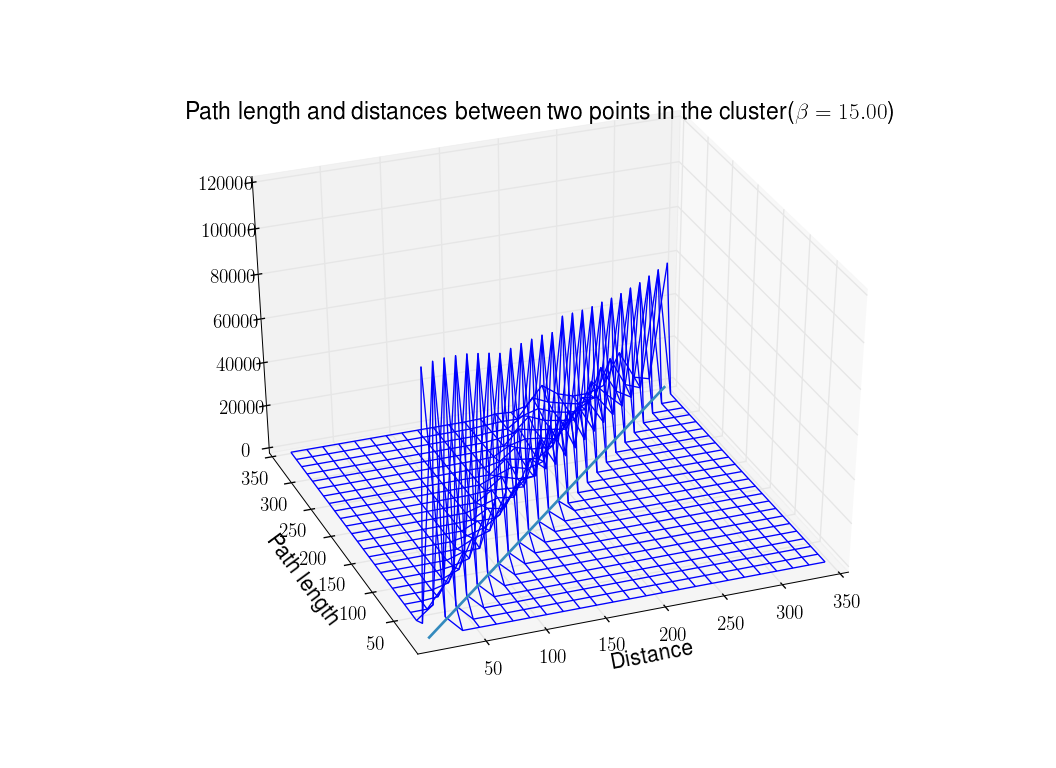

In [5]:
plot_3d_wireframe(result_data_path['15'])

<IPython.core.display.Javascript object>


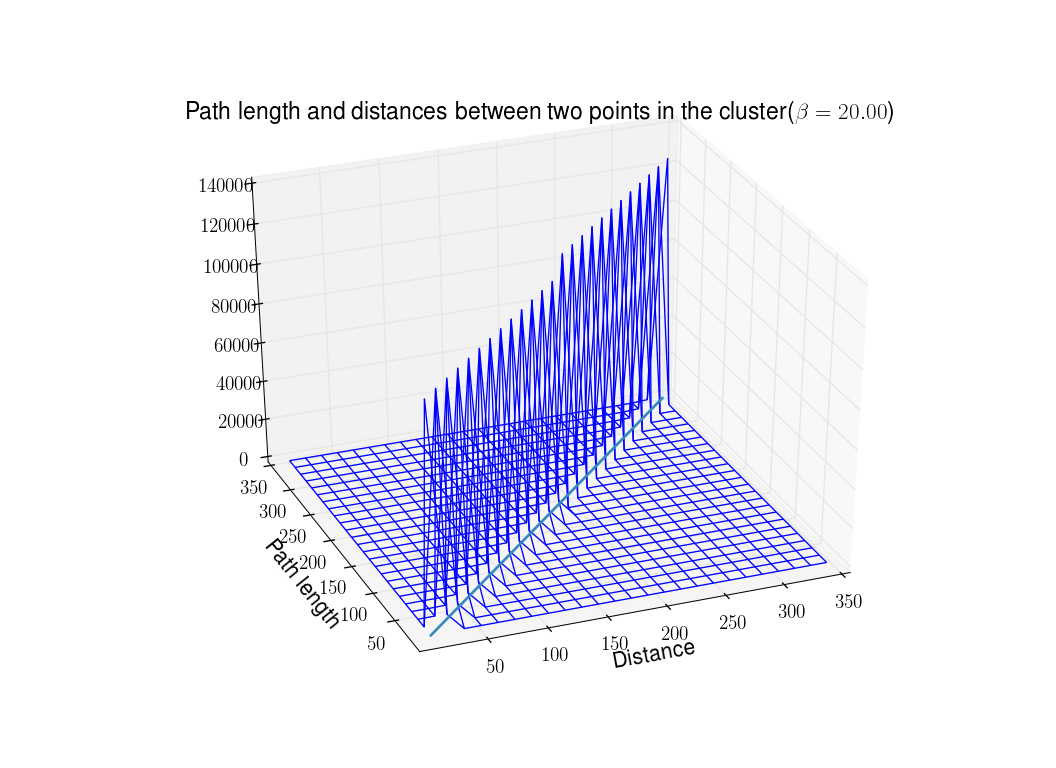

In [6]:
plot_3d_wireframe(result_data_path['20'])

<IPython.core.display.Javascript object>


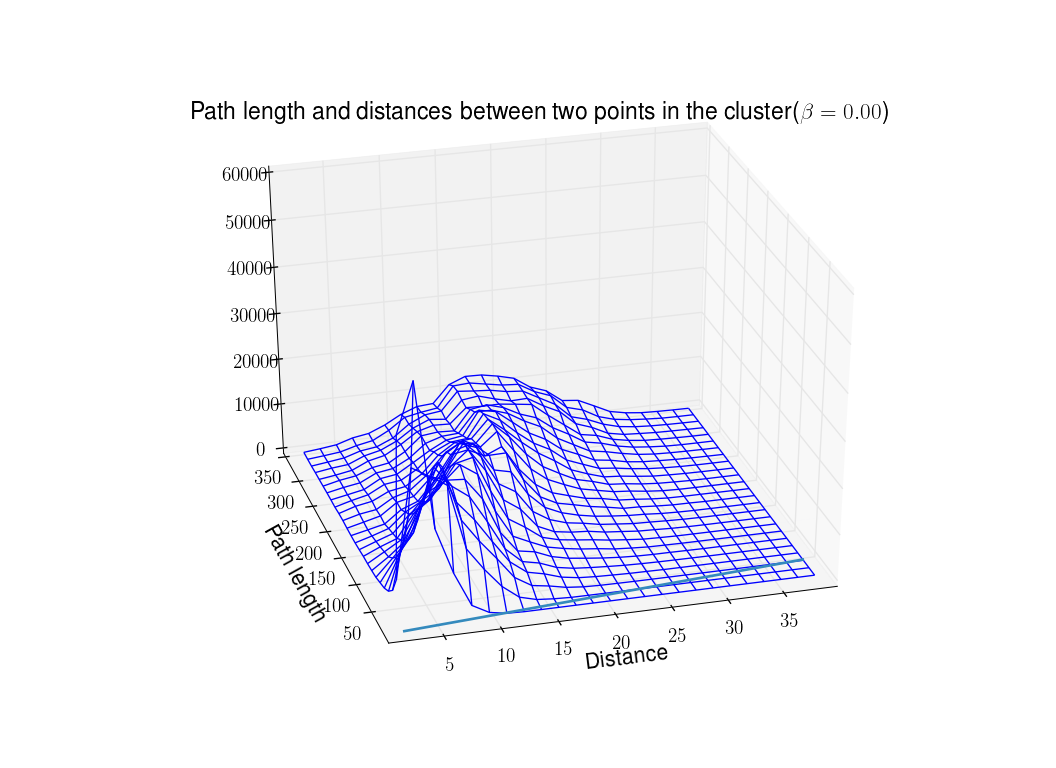

In [4]:
plot_3d_wireframe(result_data_path['0-2'])

<IPython.core.display.Javascript object>


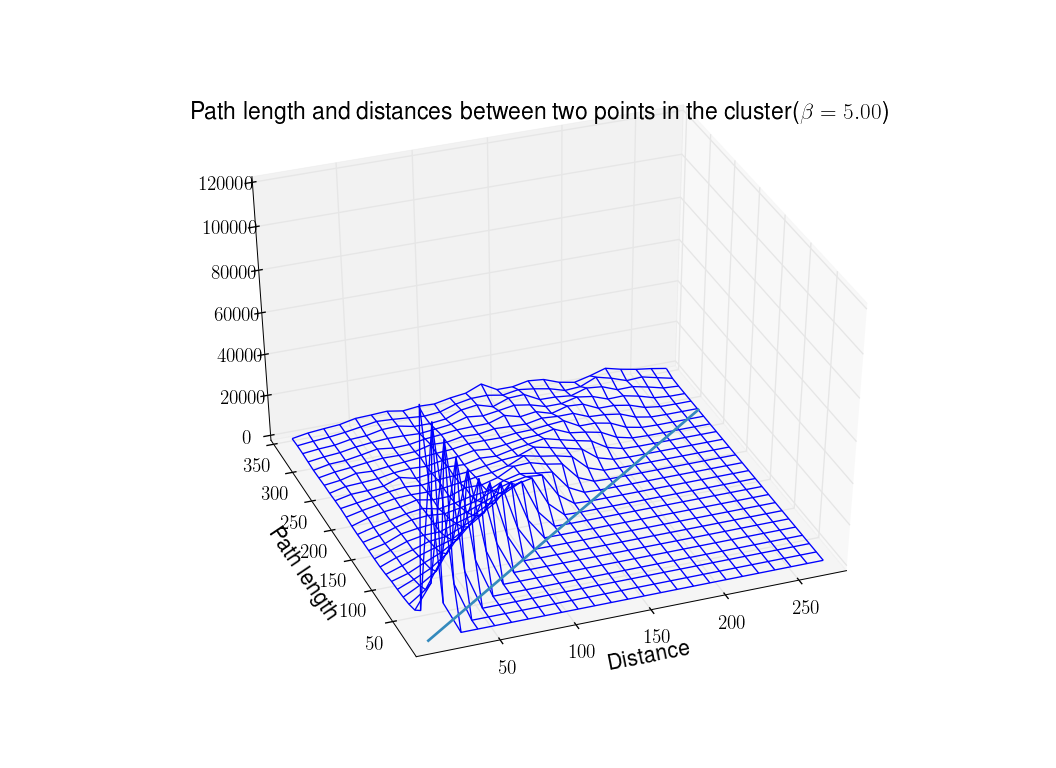

In [7]:
plot_3d_wireframe(result_data_path['5-2'])

<IPython.core.display.Javascript object>


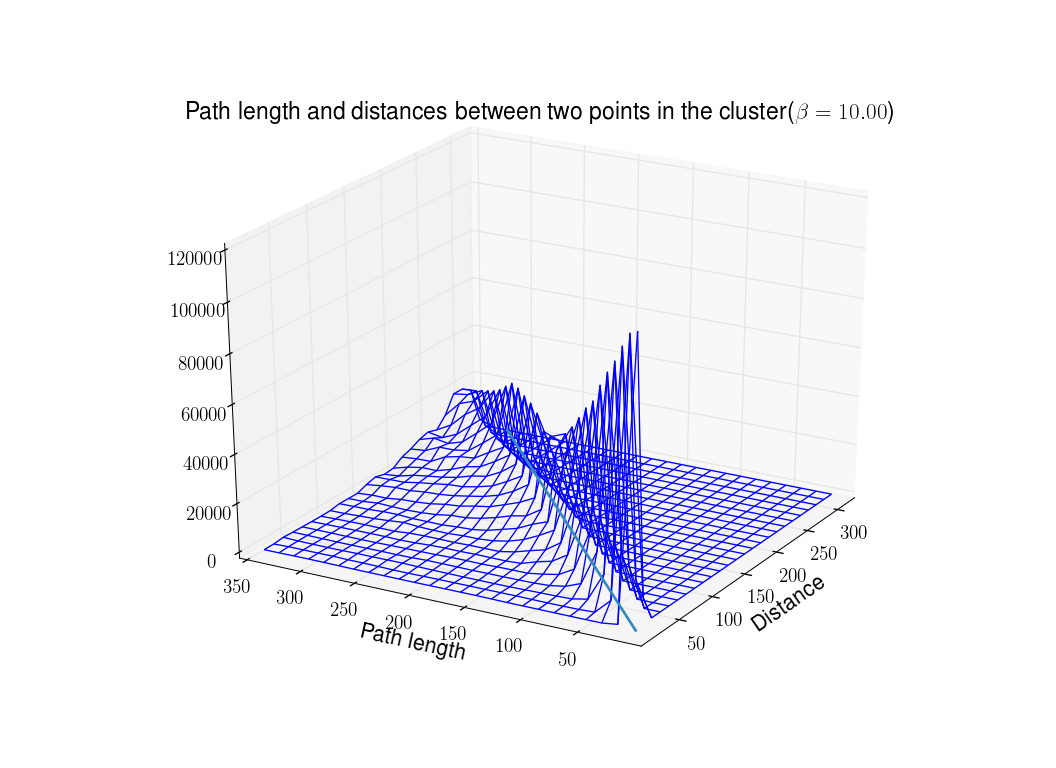

In [8]:
plot_3d_wireframe(result_data_path['10-2'])

<IPython.core.display.Javascript object>


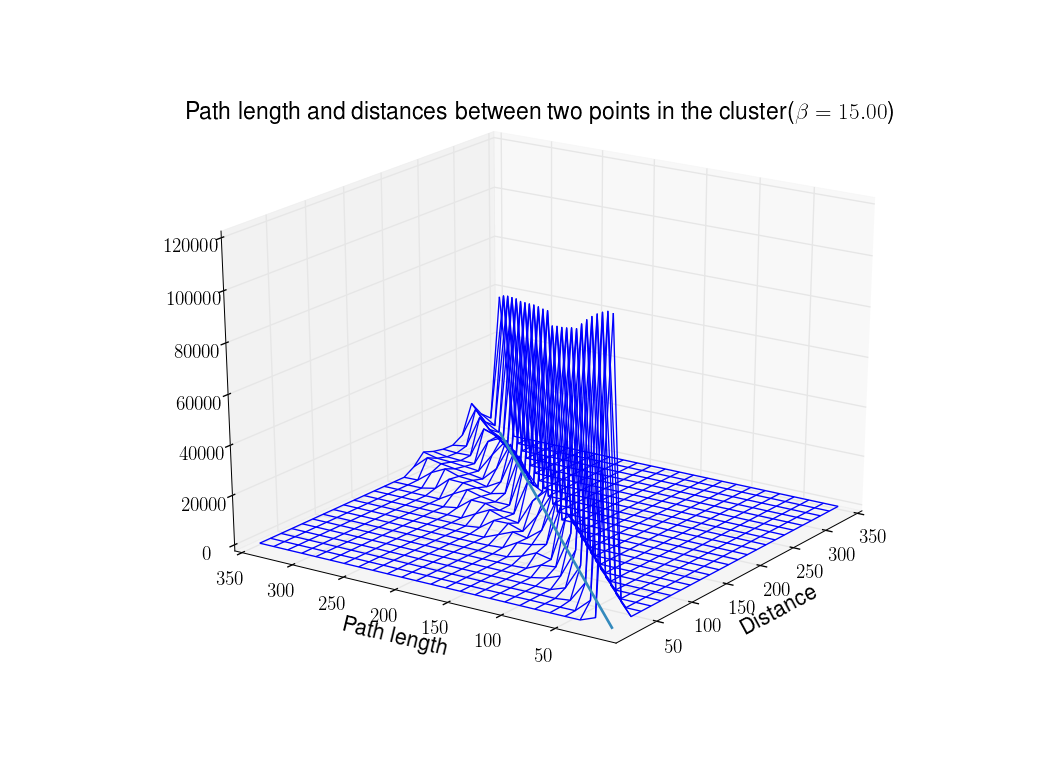

In [9]:
plot_3d_wireframe(result_data_path['15-2'])

<IPython.core.display.Javascript object>


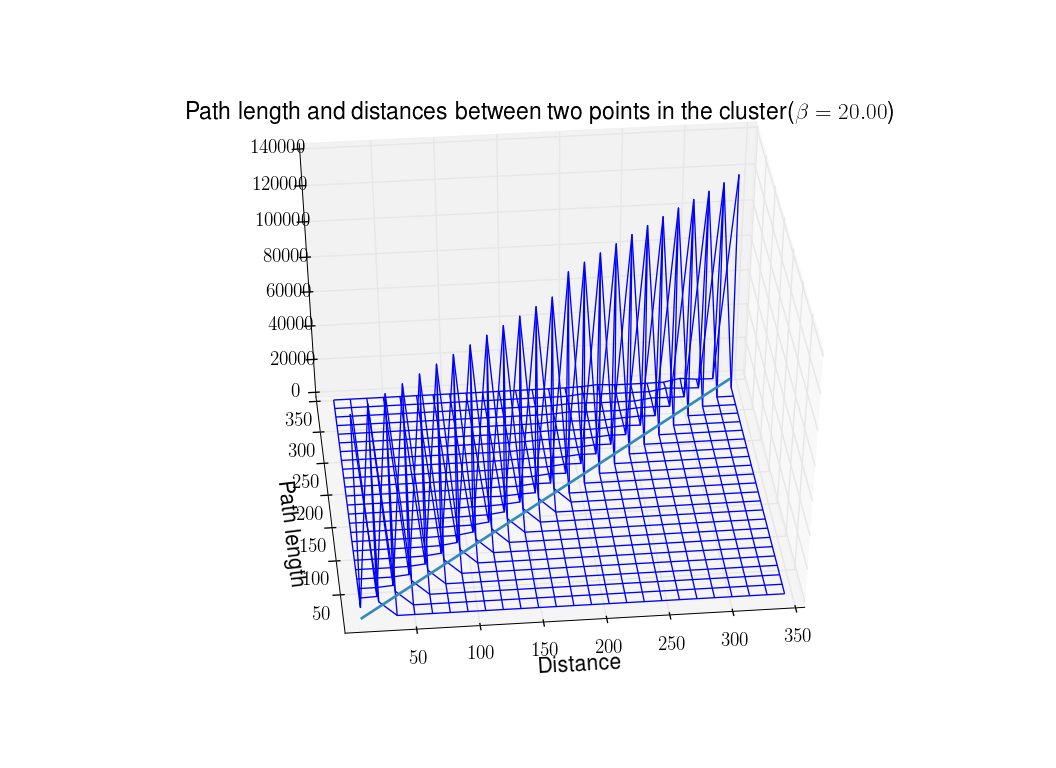

In [10]:
plot_3d_wireframe(result_data_path['20-2'])

## Tortuosity

Tortuosity(迷路度)なるものがあるらしい。
空隙度などと並んで，多孔質物質の物性を評価するのに用いられる指標のようだ。

2点間のパス長と幾何学的距離の間の比で求められ，
tortuosityが1だと，その曲線は直線である。

In [67]:
def plot_tortuosity(filename):
    data = np.load(filename)
    beta = data['beta']
    num_of_strings = data['num_of_strings']
    L = data['L']
    frames = data['frames']
    distance_list = data['distance_list']
    path_length = data['path_length']

    num_of_pairs = 300
    
    x = np.array(path_length)
    x = x.reshape((num_of_strings, int(x.shape[0] / num_of_strings / num_of_pairs), num_of_pairs))
    
    y = np.array(distance_list)
    y = y.reshape((num_of_strings, int(y.shape[0] / num_of_strings/ num_of_pairs), num_of_pairs))
    y = y / x
    
    y_ave = np.average(y, axis=2)
    
    L = x[0, :, 0]
    print L
    lambda_ave = np.average(y_ave, axis=0)
    print  lambda_ave
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(L, lambda_ave) 

    ax.set_xlabel(r'Path length $L$')
    ax.set_ylabel(r'Tortuosity $T$')
    ax.set_title('Tortuosity $T = \lambda_{\text{avg}} / L$ '
                + r'($\beta = %2.2f$)' % beta)
    plt.show()

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

<IPython.core.display.Javascript object>


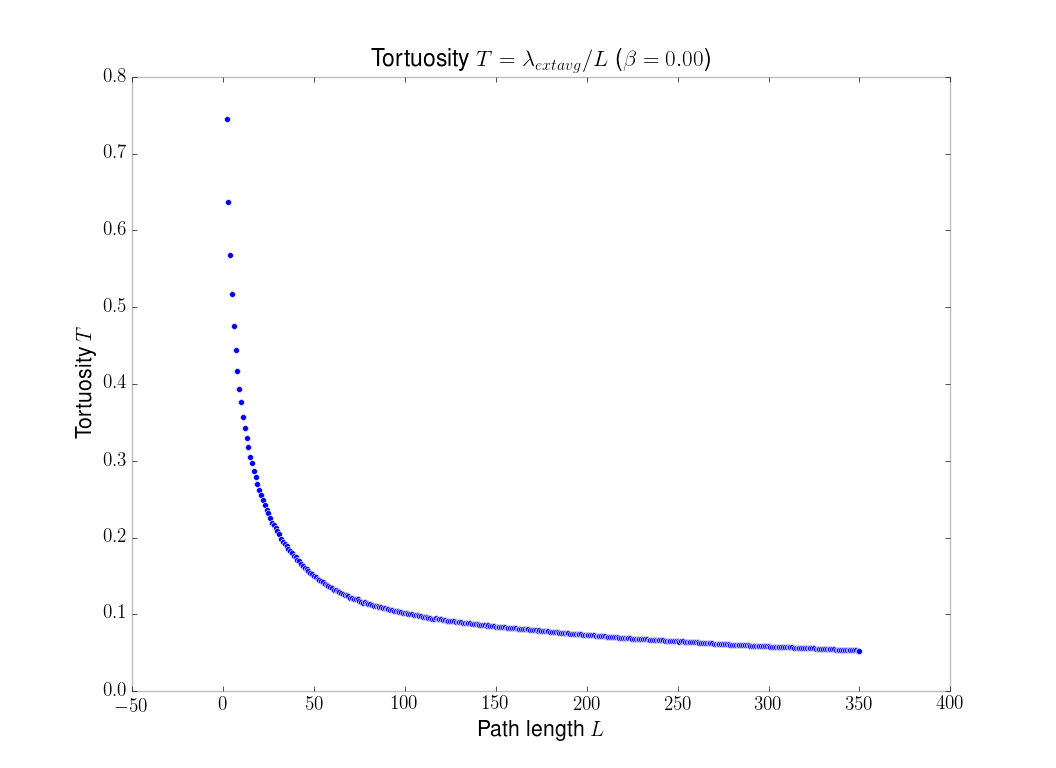

In [68]:
plot_tortuosity(result_data_path['0-2'])

In [69]:
def calc_tortuosity_for_each_beta(filename):
    data = np.load(filename)
    beta = data['beta']
    num_of_strings = data['num_of_strings']
    L = data['L']
    frames = data['frames']
    distance_list = data['distance_list']
    path_length = data['path_length']

    num_of_pairs = 300
    
    x = np.array(path_length)
    x = x.reshape((num_of_strings, int(x.shape[0] / num_of_strings / num_of_pairs), num_of_pairs))
    
    y = np.array(distance_list)
    y = y.reshape((num_of_strings, int(y.shape[0] / num_of_strings/ num_of_pairs), num_of_pairs))
    y = y / x
    
    y_ave = np.average(y, axis=2)
    
    L = x[0, :, 0]
    lambda_ave = np.average(y_ave, axis=0)
    return L, lambda_ave

<IPython.core.display.Javascript object>


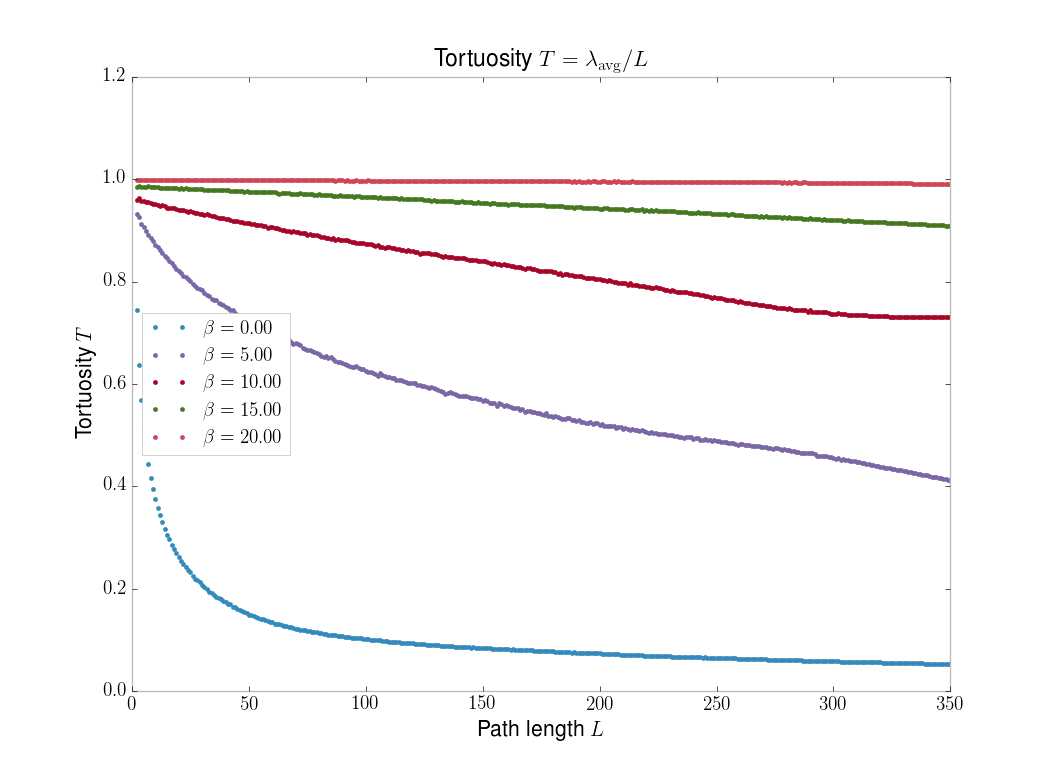

In [85]:
fig, ax = plt.subplots()
for i in [0, 5, 10, 15, 20]:
    fn = result_data_path['%d-2' % i]
    ax.plot(*calc_tortuosity_for_each_beta(fn), ls='', marker='.', label=r'$\beta = %2.2f$' % float(i))
ax.set_xlabel(r'Path length $L$')
ax.set_ylabel(r'Tortuosity $T$')
ax.set_title('Tortuosity $T = \lambda_{\mathrm{avg}} / L$')
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


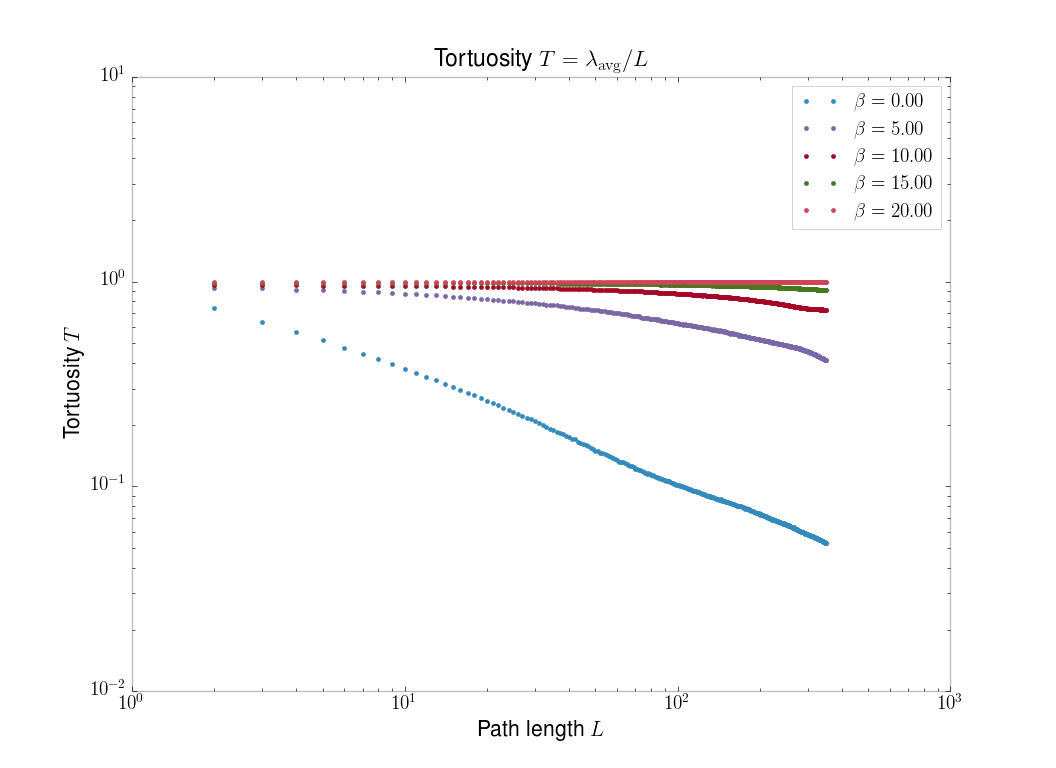

In [86]:
fig, ax = plt.subplots()
for i in [0, 5, 10, 15, 20]:
    fn = result_data_path['%d-2' % i]
    ax.loglog(*calc_tortuosity_for_each_beta(fn), ls='', marker='.', label=r'$\beta = %2.2f$' % float(i))
ax.set_xlabel(r'Path length $L$')
ax.set_ylabel(r'Tortuosity $T$')
ax.set_title('Tortuosity $T = \lambda_{\mathrm{avg}} / L$')
ax.legend(loc='best')
plt.show()

collapseできないか?

In [88]:
from optimize import Optimize_powerlaw

In [89]:

def fit_to_powerlaw_for_beta(i):

    fn = result_data_path['%d-2' % i]
    L, T = calc_tortuosity_for_each_beta(fn)

    optimizer = Optimize_powerlaw(args=(L, T), parameters=[0., -0.5])
    result = optimizer.fitting()
    fig, ax = plt.subplots()
    
    ax.loglog(L, T, ls='', marker='.', label=r'$\beta = %2.2f$' % float(i))
    ax.loglog(L, optimizer.fitted(L), lw=2, label=r'$\alpha = %f$' % result['D'])
    ax.set_xlabel(r'Path length $L$')
    ax.set_ylabel(r'Tortuosity $T$')
    ax.set_title('Tortuosity $T = \lambda_{\mathrm{avg}} / L$')
    ax.legend(loc='best')
    plt.show()

<IPython.core.display.Javascript object>


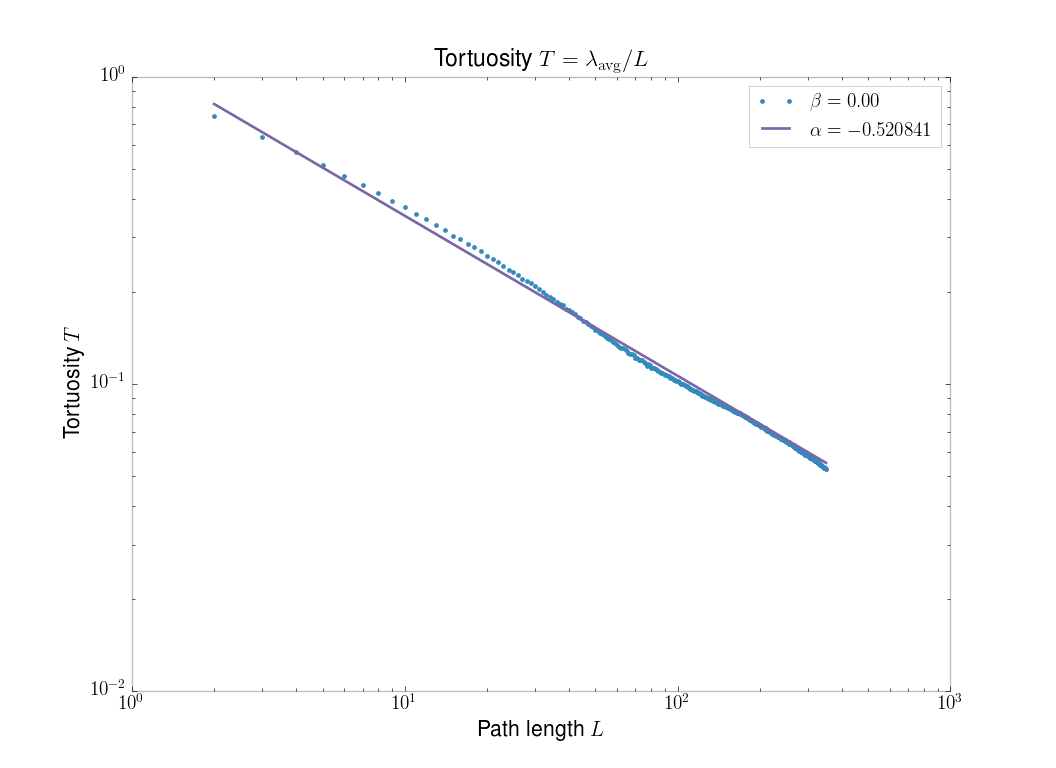

In [90]:
fit_to_powerlaw_for_beta(0)

<IPython.core.display.Javascript object>


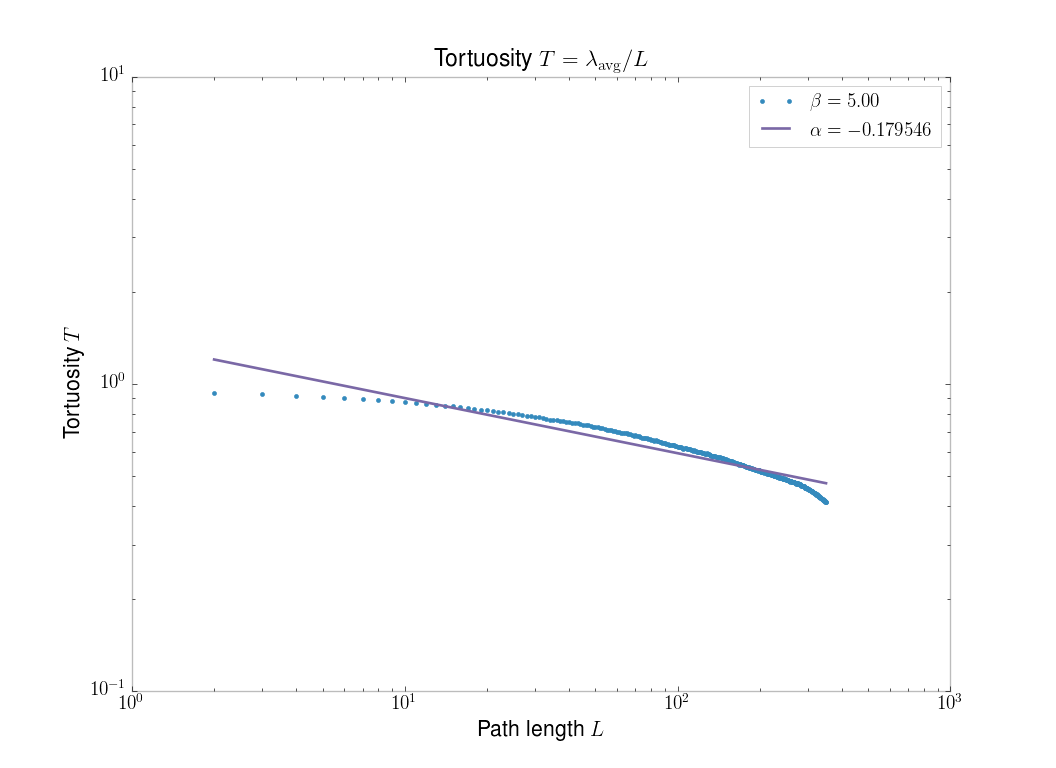

In [91]:
fit_to_powerlaw_for_beta(5)

<IPython.core.display.Javascript object>


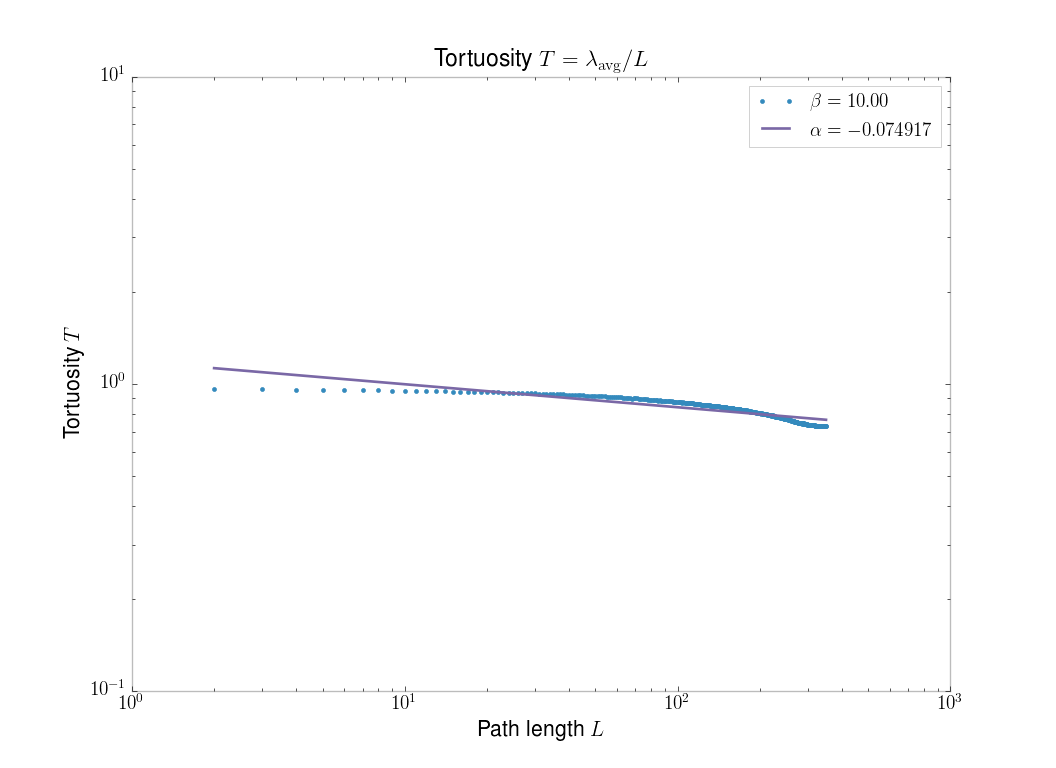

In [92]:
fit_to_powerlaw_for_beta(10)

<IPython.core.display.Javascript object>


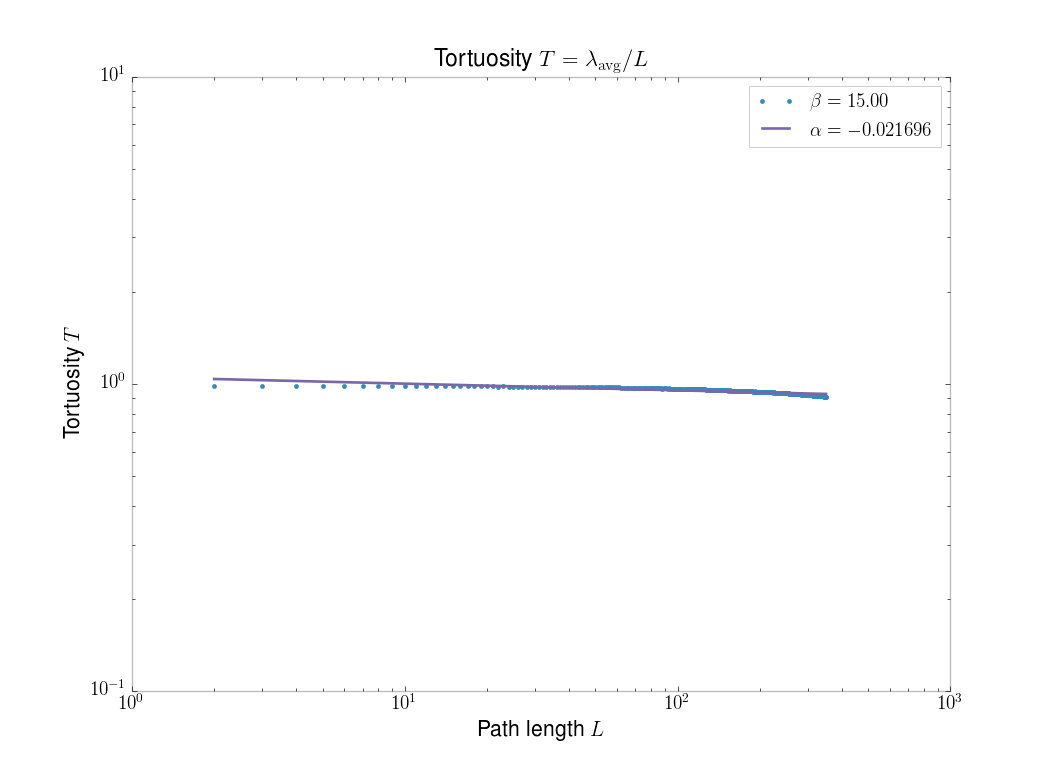

In [93]:
fit_to_powerlaw_for_beta(15)

<IPython.core.display.Javascript object>


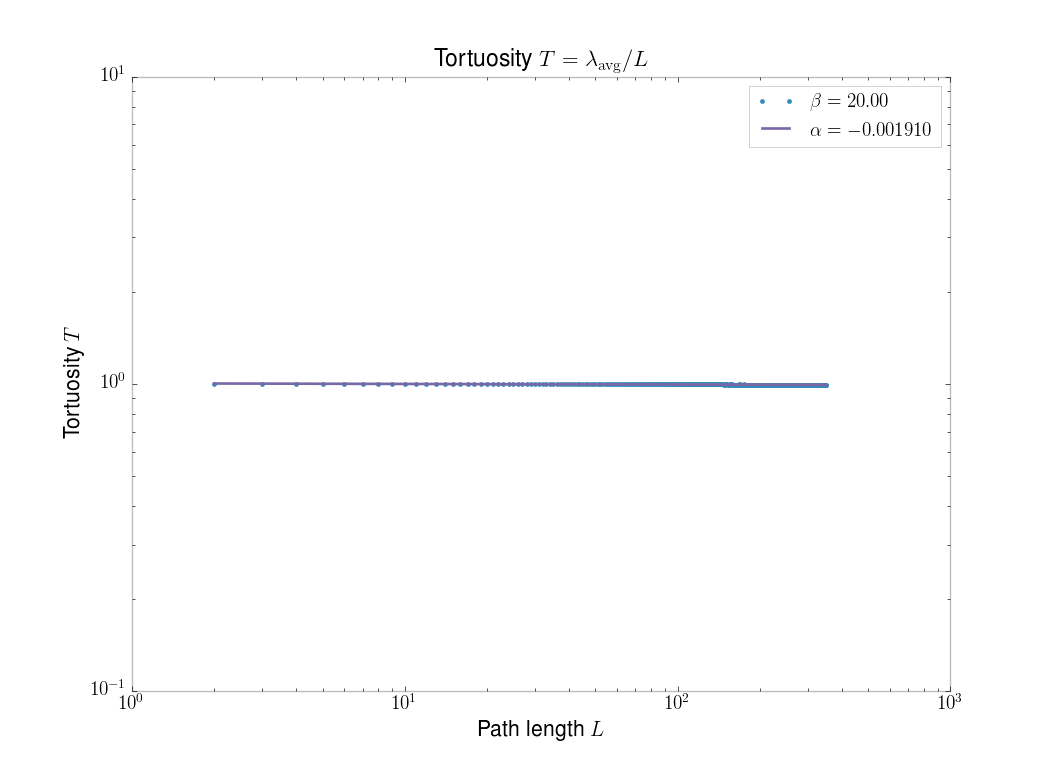

In [94]:
fit_to_powerlaw_for_beta(20)

In [117]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

In [136]:
Ls, Ts = {}, {}
for i in [0, 5, 10, 15, 20]:
    fn = result_data_path['%d-2' % i]
    L, T = calc_tortuosity_for_each_beta(fn)
    Ls[i] = L
    Ts[i] = T

<IPython.core.display.Javascript object>


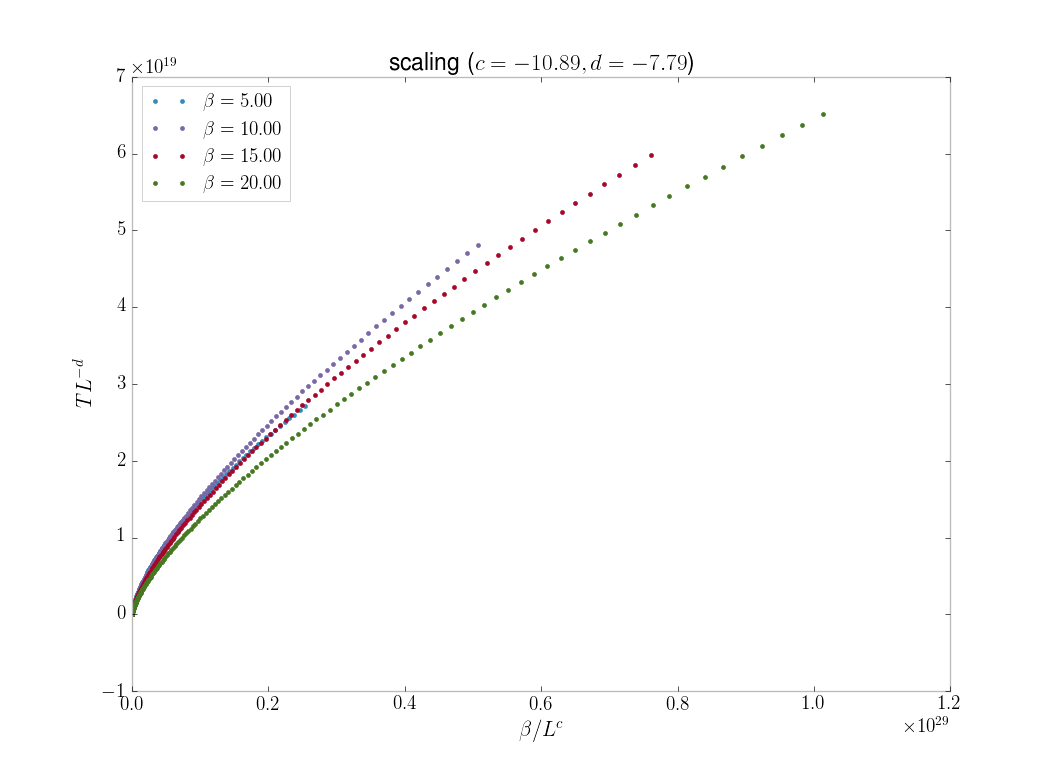

In [144]:
@interact(c=(-15., 5., 0.01), d=(-15., 5., 0.01))
def collapsed(c=-10., d=-8.):
    fig, ax = plt.subplots()
    for i in [5, 10, 15, 20]:
        L, T = Ls[i], Ts[i]
        ax.plot(float(i) / (L**c), T * (L**(-d)) , ls='', marker='.', label=r'$\beta = %2.2f$' % float(i))
    ax.set_xlabel(r'$\beta / L^{c}$')
    ax.set_ylabel(r'$T L^{-d}$')
    ax.set_title(r'scaling ($c = %2.2f, d = %2.2f$)' % (c, d))
    ax.legend(loc='best')